## Turkish Lira Banknote Dataset ##
Bu veri kümesi, görme engelli insanlar için uygulamalar geliştirmek amacıyla toplanmıştır. Her banknot kategorisi klasörlere ayrılmıştır. Her klasör 1000 görüntü içerir: 925'i eğitim için, 75'i doğrulama için kullanılmıştır. Bazı veri artırma teknikleri uygulanmıştır (parlaklığı artırma, parlaklığı azaltma, çevirme, tuz-biber gürültüsü ekleme). Görüntü boyutu: (1280, 720, 3). Bu veri kümesi, yapay zeka ve görüntü işleme alanında çalışanlar için ilginç olabilir. 😊

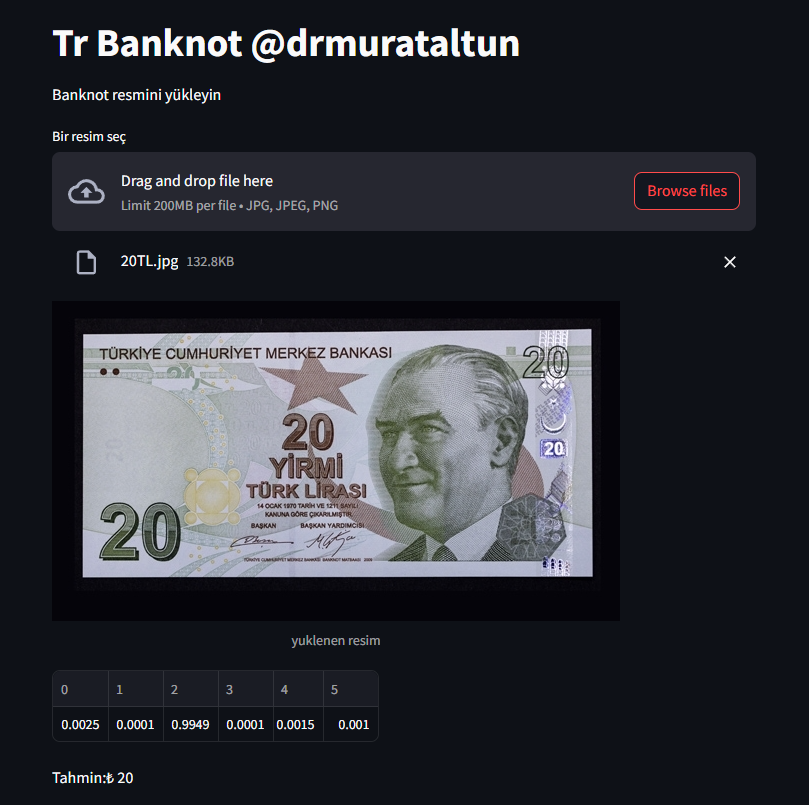

### Kütüphaneleri Yükle ##

In [1]:
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

## Veri Setii ve Etiketler ##

In [2]:
labels = ['5','10','20','50','100','200']
img_path = '/kaggle/input/turkish-lira-banknote-dataset/'

In [3]:
# data frame için label ve path listesi oluştur
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [4]:
#label ve path ile dataframe oluştur
df = pd.DataFrame({'path':img_list,'label':label_list})

## EDA ##

In [5]:
df.head

<bound method NDFrame.head of                                                    path label
0     /kaggle/input/turkish-lira-banknote-dataset/5/...     5
1     /kaggle/input/turkish-lira-banknote-dataset/5/...     5
2     /kaggle/input/turkish-lira-banknote-dataset/5/...     5
3     /kaggle/input/turkish-lira-banknote-dataset/5/...     5
4     /kaggle/input/turkish-lira-banknote-dataset/5/...     5
...                                                 ...   ...
5995  /kaggle/input/turkish-lira-banknote-dataset/20...   200
5996  /kaggle/input/turkish-lira-banknote-dataset/20...   200
5997  /kaggle/input/turkish-lira-banknote-dataset/20...   200
5998  /kaggle/input/turkish-lira-banknote-dataset/20...   200
5999  /kaggle/input/turkish-lira-banknote-dataset/20...   200

[6000 rows x 2 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    6000 non-null   object
 1   label   6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


## Etiketleri Label Encoding Yapma ##

In [7]:
d={'5':0,'10':1,'20':2,'50':3,'100':4,'200':5}

In [8]:
df['encode_label']=df['label'].map(d)

<Axes: xlabel='encode_label'>

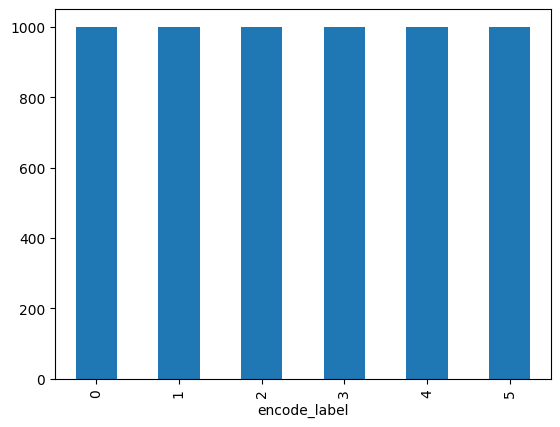

In [9]:
#Etiket dağılımı
df['encode_label'].value_counts().plot(kind='bar')

## Örnekleri Gösterme ##

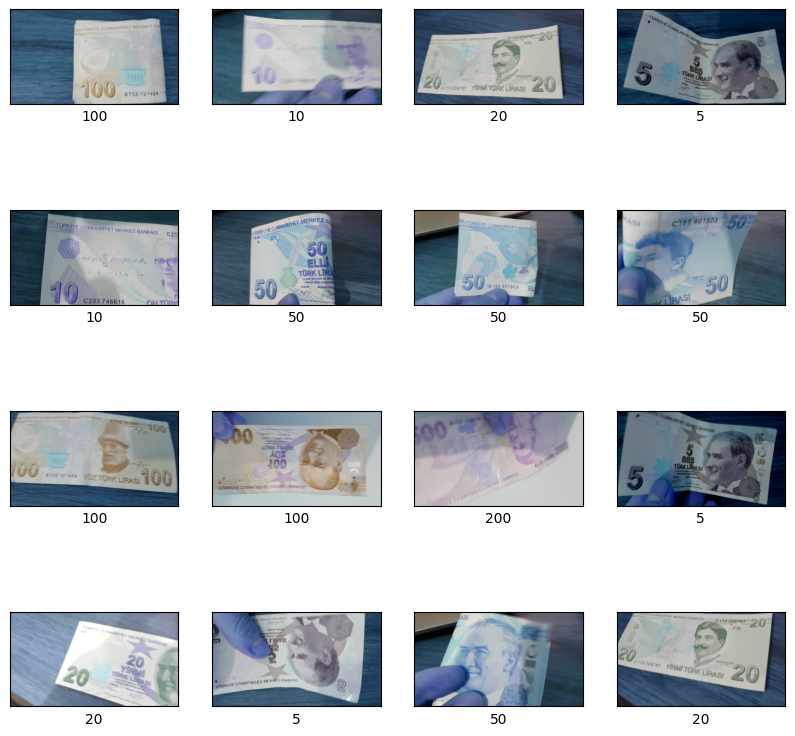

In [10]:
# Rastgele 4x4 resim çekme
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
df_sample = df.sample(16)
for i, axi in enumerate(ax.flat):
    axi.imshow(cv2.imread(str(df_sample['path'].iloc[i])))
    axi.set(xticks=[], yticks=[], xlabel=df_sample['label'].iloc[i])

## Resim Ön İşleme ##

In [11]:
x=[]
for img in df['path']:
    img=cv2.imread(img)
    img=cv2.resize(img,(30,30))
    img=img/255.0   
    x.append(img)

In [12]:
# Numpy dizisine çevir
x=np.array(x)

## Etiketleri Belirleme ##

In [13]:
y=df['encode_label']

## Veri Setini Bölme ##

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

## Keras DL Modeli ##

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Modeli oluştur
model = Sequential()

# Input katmanı
model.add(Input(shape=(30, 30, 3)))

# 1. Convential bloğu
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# 2. Convential bloğu
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# 3. Convential bloğu
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# 4. Convential bloğu
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Tam bağlantılı katmanlar
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# Erken durdurma
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

# Modeli derle
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modelin özetini yazdır
model.summary()

2024-06-22 22:20:40.606028: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-22 22:20:40.606209: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-22 22:20:40.790085: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │         1,54

 Total params: 1,439,782 (5.49 MB)

 Trainable params: 1,438,246 (5.49 MB)

 Non-trainable params: 1,536 (6.00 KB)

## Modeli Eğit ##

In [16]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), 
                    epochs=30,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 28s 154ms/step - accuracy: 0.1761 - loss: 2.7789 - val_accuracy: 0.2708 - val_loss: 2.4627
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 143ms/step - accuracy: 0.3863 - loss: 1.4255 - val_accuracy: 0.2875 - val_loss: 2.0090
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 150ms/step - accuracy: 0.4503 - loss: 1.2608 - val_accuracy: 0.5117 - val_loss: 1.0025
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 40s 147ms/step - accuracy: 0.4799 - loss: 1.1561 - val_accuracy: 0.6042 - val_loss: 0.9432
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 151ms/step - accuracy: 0.5686 - loss: 1.0279 - val_accuracy: 0.5542 - val_loss: 1.0299
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 152ms/step - accuracy: 0.6394 - loss: 0.8778 - val_accuracy: 0.7050 - val_loss: 0.7615
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 144ms/step - accuracy: 0.7152 - loss: 0.7277 - val_accuracy: 0.7850 - val_loss: 0.5319
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 149ms/step - accuracy: 0.8011 - loss: 0

## Modeli Kaydet ##

In [17]:
model.save('tr_banknot_model.h5')

## Validation Verisi Üstünde Tahmin Yap ##

In [18]:
y_pred_proba = model.predict(X_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step


In [19]:
# Tamin olasılıklarını etiketlere çevir
y_pred = np.argmax(y_pred_proba, axis=1)

## Modeli Değerlendir ##

<Axes: >

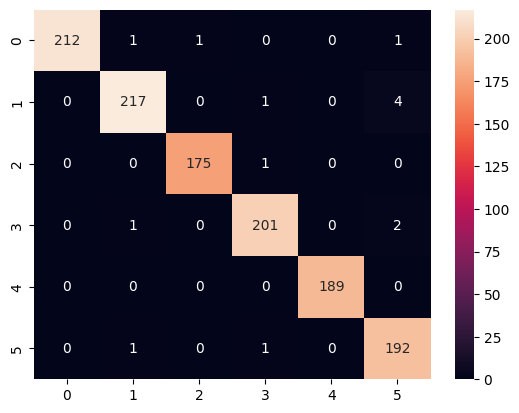

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import seaborn as sns
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')

In [21]:
#Doğruluk Oranı
accuracy_score(y_test, y_pred)

0.9883333333333333